# Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.\\


One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In [2]:
Image(url = "https://rmstitanichotel.co.uk/wp-content/uploads/2015/09/Titanic-Cobh-Harbour-1912-768x345.jpg")

**Titanic route was from Southampton,UK to New York City,USA**,the port of registry of it is ***Liverpool*** (The City where MO Salah play in) :smiley:

In [3]:
Image(url= 'http://www.sharethecity.org/wp-content/uploads/2017/01/17-01-13-Titanic-Liverpool-stern-e1484354043152.png')

In [4]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/iUD0_Ym77Qw" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

*I Highly encourage you to watch this documentary to discover the full story*

## Let's Beign the Data Science time :) 

In [5]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
%matplotlib inline
from IPython.display import Image
from IPython.display import HTML
import pydotplus

In [6]:
train_titanic = pd.read_csv('train.csv')
test_titanic = pd.read_csv('test.csv')

In [7]:
train_titanic.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
train_titanic.info()
print('_'*40)
test_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

### Exploratory Data Analysis

In [5]:
train_titanic.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

**Check the number of missing values in each feature**

In [6]:
train_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Number of Survived Passengers in each class**

In [7]:
train_titanic[['Pclass', 'Survived']].groupby(['Pclass'], 
                                         as_index=False).mean().sort_values(by='Survived', ascending=False)

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

**Number of Survived Passengers in each Gender**

In [8]:
train_titanic[["Sex", "Survived"]].groupby(['Sex'], as_index=
                                           False).mean().sort_values(by='Survived', ascending=False)

Sex  Survived
0  female  0.742038
1    male  0.188908

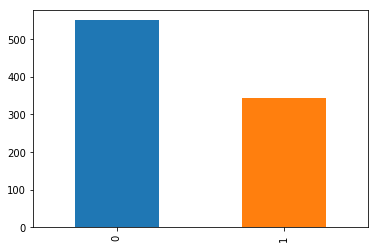

In [9]:
train_titanic['Survived'].value_counts().plot(kind='bar')

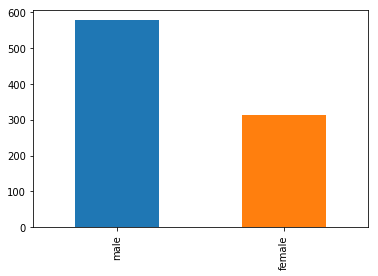

In [10]:
train_titanic['Sex'].value_counts().plot(kind='bar')

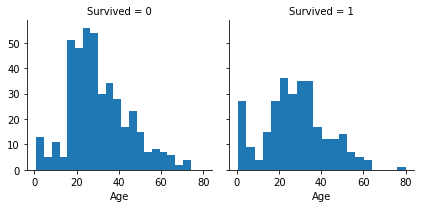

In [11]:
g = sns.FacetGrid(train_titanic, col='Survived')
g.map(plt.hist, 'Age', bins=20)

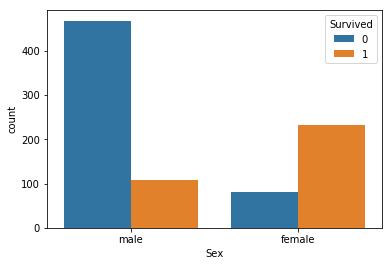

In [12]:
sns.countplot(x="Sex", hue="Survived", data=train_titanic);

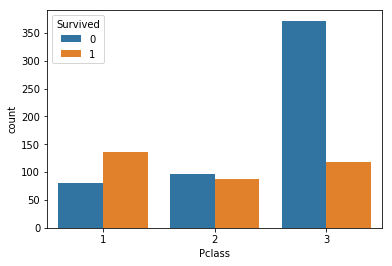

In [13]:
sns.countplot(x="Pclass", hue="Survived", data=train_titanic);

In [14]:
train_titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

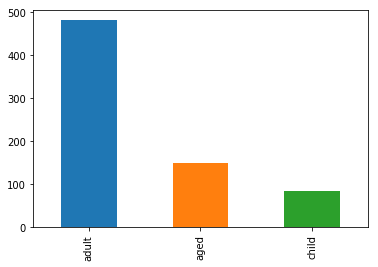

In [15]:


# create a ranges of age to group the passagers
train_titanic['AgeRange'] = pd.cut(train_titanic['Age'],
                              [0, 15, 40, 80], labels=['child', 'adult', 'aged'])

# visualize the number of passagers per age range
train_titanic['AgeRange'].value_counts().plot(kind='bar')



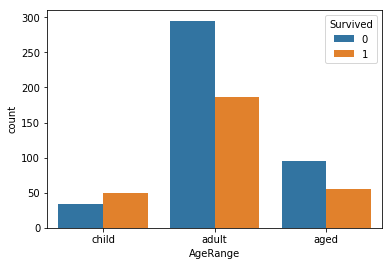

In [16]:

sns.countplot(x="AgeRange", hue="Survived", data=train_titanic);


### Preprocessing

The Cabin Feature can be deleted but,We can make a hypothesis that the cabin number *C123* refers to the deck.

In [12]:

deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_titanic, test_titanic]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)


train_titanic = train_titanic.drop(['Cabin'], axis=1)
test_titanic = test_titanic.drop(['Cabin'], axis=1)

In [13]:
data = [train_titanic, test_titanic]
for dataset in data:
    mean = train_titanic["Age"].mean()
    std = test_titanic["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values from mean and Stdev. in rand_age
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_titanic["Age"].astype(int)

train_titanic["Age"].isnull().sum()

0

In [15]:
common_value = 'S'
data = [train_titanic, test_titanic]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [16]:
data = [train_titanic, test_titanic]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [17]:
data = [train_titanic, test_titanic]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)

train_titanic = train_titanic.drop(['Name'], axis=1)
test_titanic = test_titanic.drop(['Name'], axis=1)

In [18]:
genders = {"male": 0, "female": 1}
data = [train_titanic, test_titanic]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [19]:
train_titanic = train_titanic.drop(['Ticket'], axis=1)
test_titanic = test_titanic.drop(['Ticket'], axis=1)

In [20]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_titanic, test_titanic]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [21]:
data = [train_titanic, test_titanic]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [39]:
train_titanic.head(5)

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  \
0            1         0       3    0    2      1      0     7         0   
1            2         1       1    1    5      1      0    71         1   
2            3         1       3    1    3      0      0     7         0   
3            4         1       1    1    5      1      0    53         0   
4            5         0       3    0    5      0      0     8         0   

   Deck  Title  
0     8      1  
1     3      3  
2     8      2  
3     3      3  
4     8      1

## Machine Learning Time

In [60]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split,KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from xgboost import XGBClassifier
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

In [18]:


# Drop unused data
train_titanic.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 
                    'Ticket', 'Cabin','Embarked', 'Age', 'Fare'], axis=1, inplace=True)



In [19]:
train_titanic.head()

Survived  Pclass     Sex AgeRange
0         0       3    male    adult
1         1       1  female    adult
2         1       3  female    adult
3         1       1  female    adult
4         0       3    male    adult

In [20]:
encoder = LabelEncoder()

train_titanic['Sex'] = encoder.fit_transform(train_titanic['Sex'])
train_titanic['AgeRange'] = encoder.fit_transform(train_titanic['AgeRange'].astype(str))

train_titanic.head()


Survived  Pclass  Sex  AgeRange
0         0       3    1         0
1         1       1    0         0
2         1       3    0         0
3         1       1    0         0
4         0       3    1         0

Split the dataframe to train/test 

In [62]:
Train,Test = train_test_split(train_titanic, test_size = 0.3, random_state=10)

Train_IndepentVars = Train.values[:, 1:4]
Train_TargetVar = Train.values[:,0]
Train_TargetVar=Train_TargetVar.astype('float')

Test_IndepentVars = Test.values[:, 1:4]
Test_TargetVar = Test.values[:,0]
Test_TargetVar = Test_TargetVar.astype('float')

ninstances_testing = Test_TargetVar.size


In [64]:
xgb = XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=100,seed=10)
xgb_pred = xgb.fit(Train_IndepentVars, Train_TargetVar).predict(Test_IndepentVars)
error_sum_xgb = sum(abs(Test_TargetVar - xgb_pred))
error_tax_xgb   = 100.0* error_sum_dtc / ninstances_testing
accuracy_score_xgb = round(accuracy_score(xgb_pred, Test_TargetVar) * 100, 2)
print ("XGBoost: Number of prediction errors: %d/%d\t Accuracy Score: %.2f%%" % 
       (error_sum_xgb, ninstances_testing, accuracy_score_xgb))


XGBoost: Number of prediction errors: 45/268	 Accuracy Score: 83.21%


/home/mahmoud/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [65]:

dtc = DecisionTreeClassifier(criterion='entropy', random_state=10, max_depth=5)
dtc.fit(Train_IndepentVars, Train_TargetVar)
predict_dtc = dtc.predict(Test_IndepentVars)
print(accuracy_score(Test_TargetVar,xgb_pred))

error_sum_dtc = sum(abs(Test_TargetVar - predict_dtc))
error_tax_dtc   = 100.0* error_sum_dtc/ninstances_testing
accuracy_score_dtc = round(accuracy_score(predict_dtc, Test_TargetVar) * 100, 2)

print ("(decision tree) Number of prediction errors: %d/%d\t Accuracy Score: %.2f%%" % (error_sum_dtc, ninstances_testing, accuracy_score_dtc))


0.832089552238806
(decision tree) Number of prediction errors: 45/268	 Accuracy Score: 83.21%


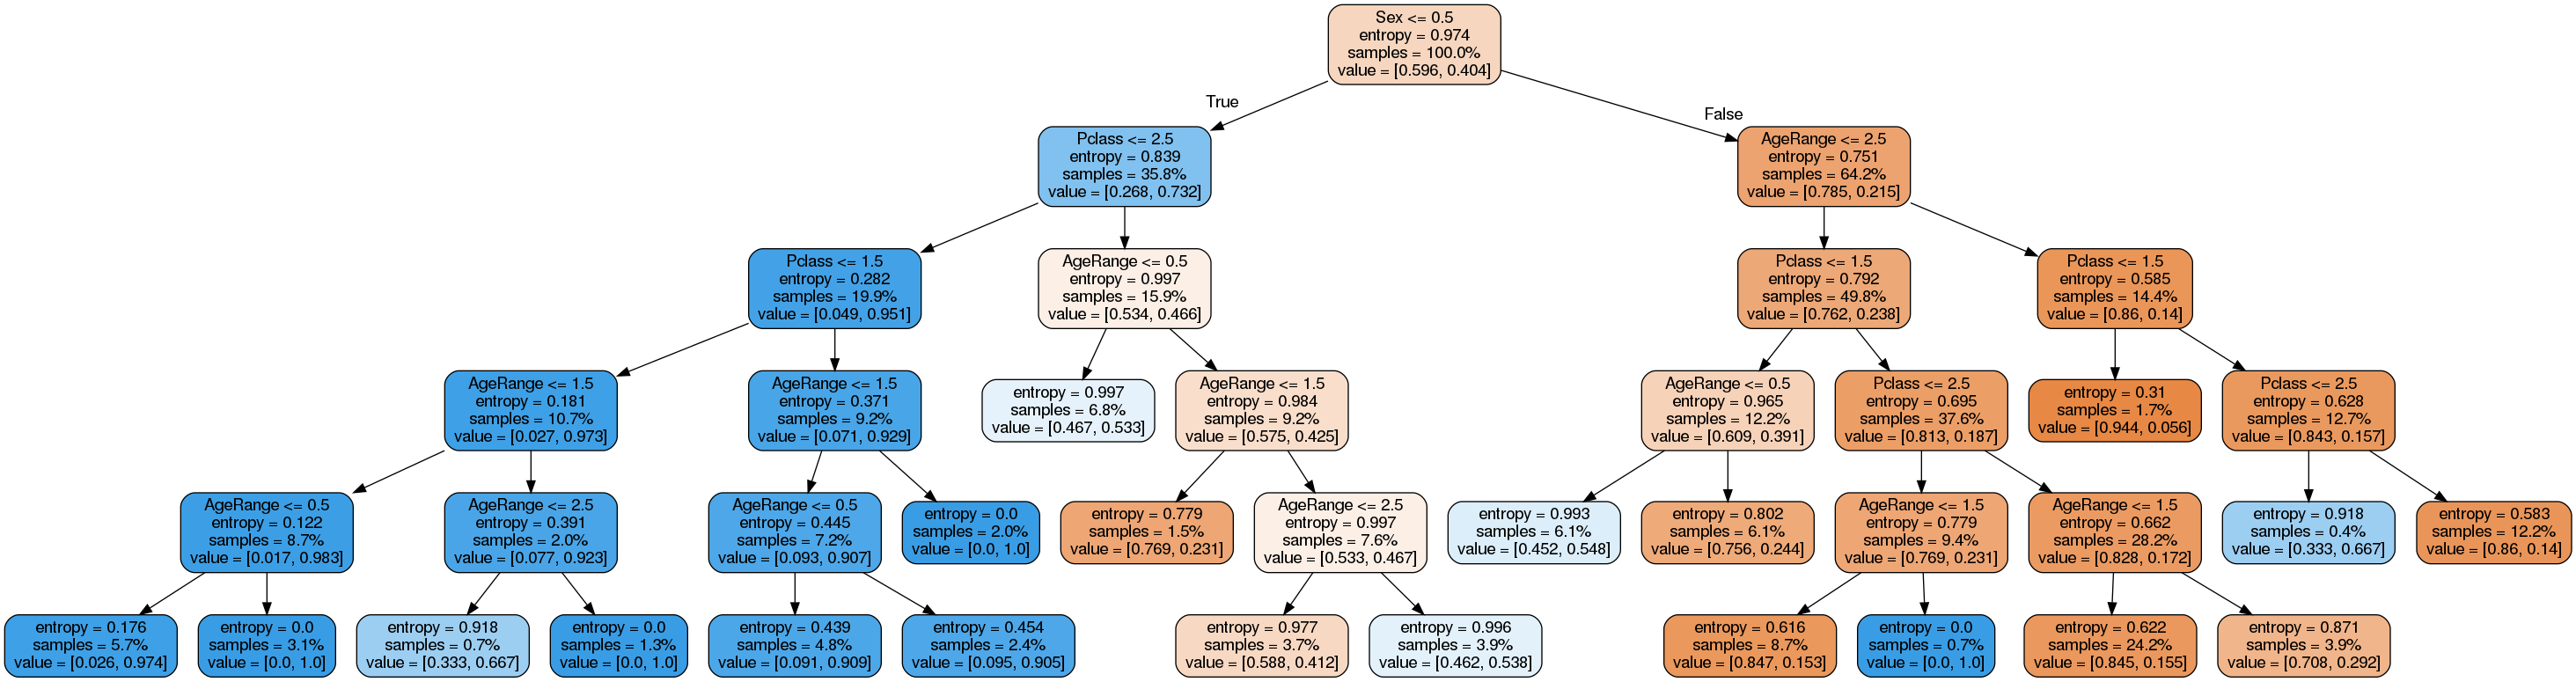

In [54]:
dot_data = StringIO()
feature_names = list(train_titanic)
class_names = ['True', 'False']
export_graphviz(dtc, out_file=dot_data,  
                  filled=True, rounded=True, feature_names=feature_names[1:4], proportion=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
display(Image(graph.create_png()))



In [63]:
rfc = RandomForestClassifier(criterion = "entropy", random_state=10, 
                             n_estimators=10, max_depth=5)
rfc.fit(Train_IndepentVars, Train_TargetVar)
predict_rfc = rfc.predict(Test_IndepentVars)
accuracy_score_rnf = round(accuracy_score(predict_rfc, Test_TargetVar) * 100, 2)

#print (" Accuracy Score of XGBoost Classifier: " , (accuracy_score_rnf))


error_sum_rfc = sum(abs(Test_TargetVar - predict_rfc))
error_tax_rfc   = 100.0*error_sum_rfc/ninstances_testing
#accuracy_score = round(accuracy_score(predict_rfc, Test_TargetVar) * (100, 2)

print ("(randon forest) Number of prediction errors: %d/%d\t Accuracy Score: %.2f%%" % (error_sum_rfc, ninstances_testing, accuracy_score_rnf))


(randon forest) Number of prediction errors: 39/268	 Accuracy Score: 85.45%


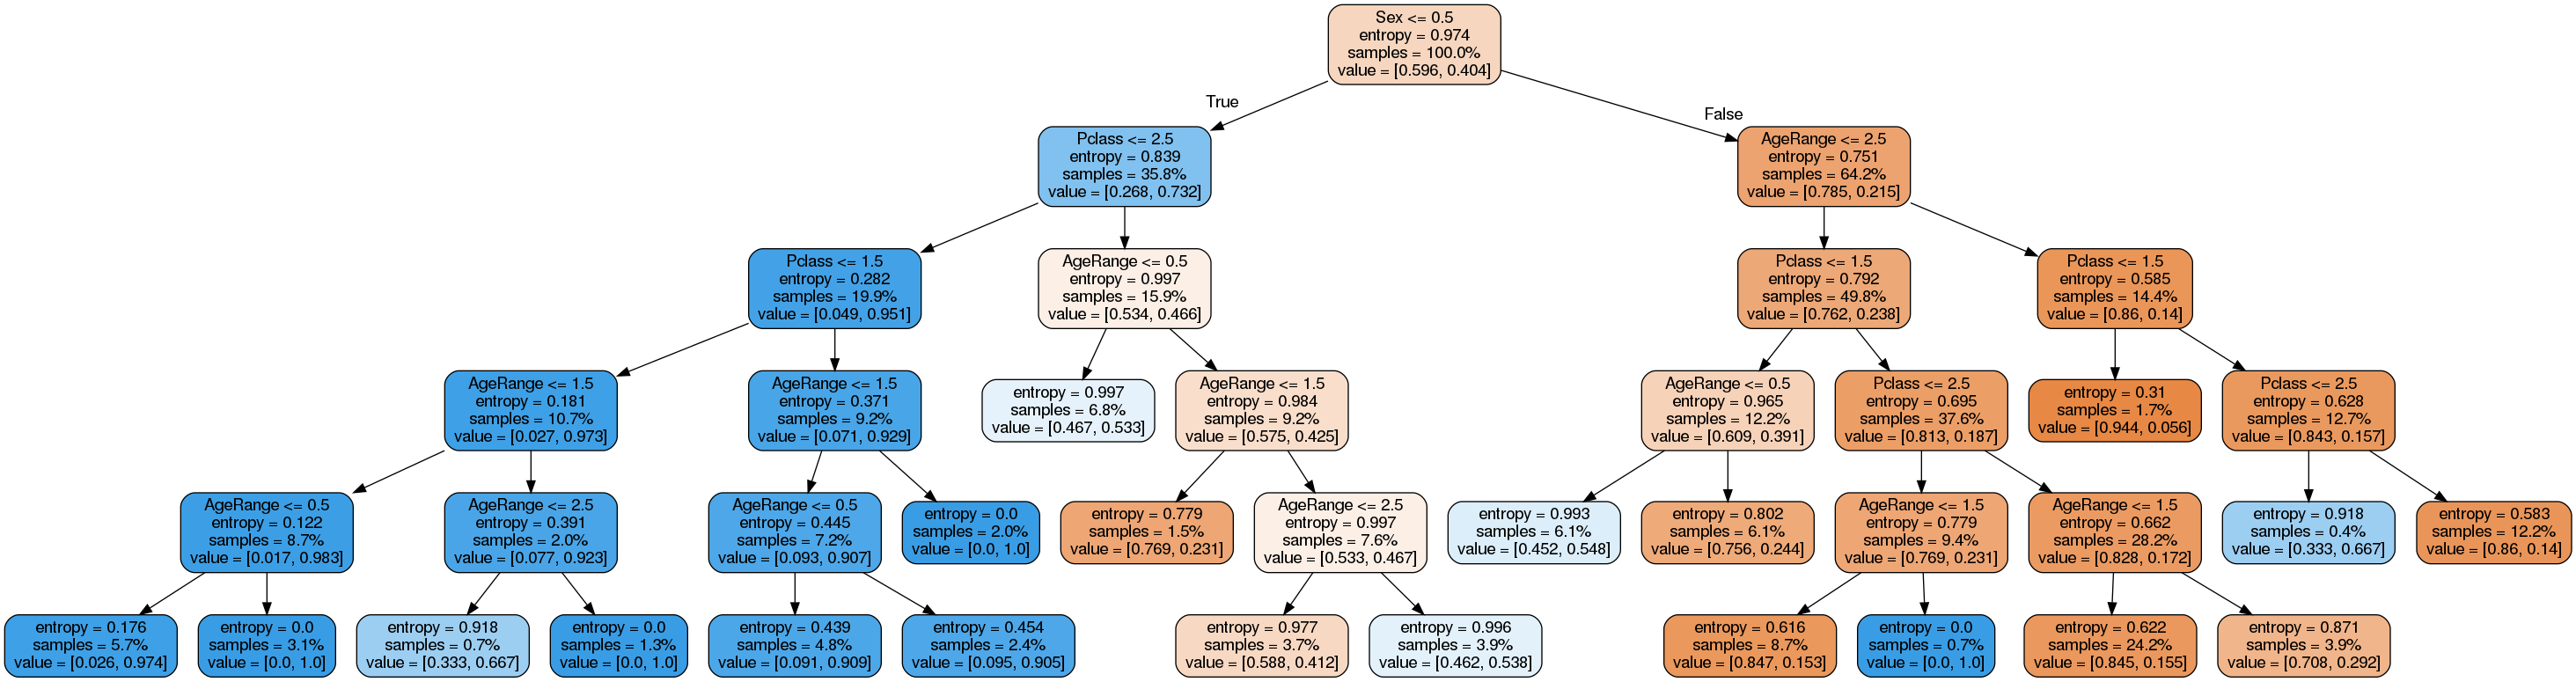

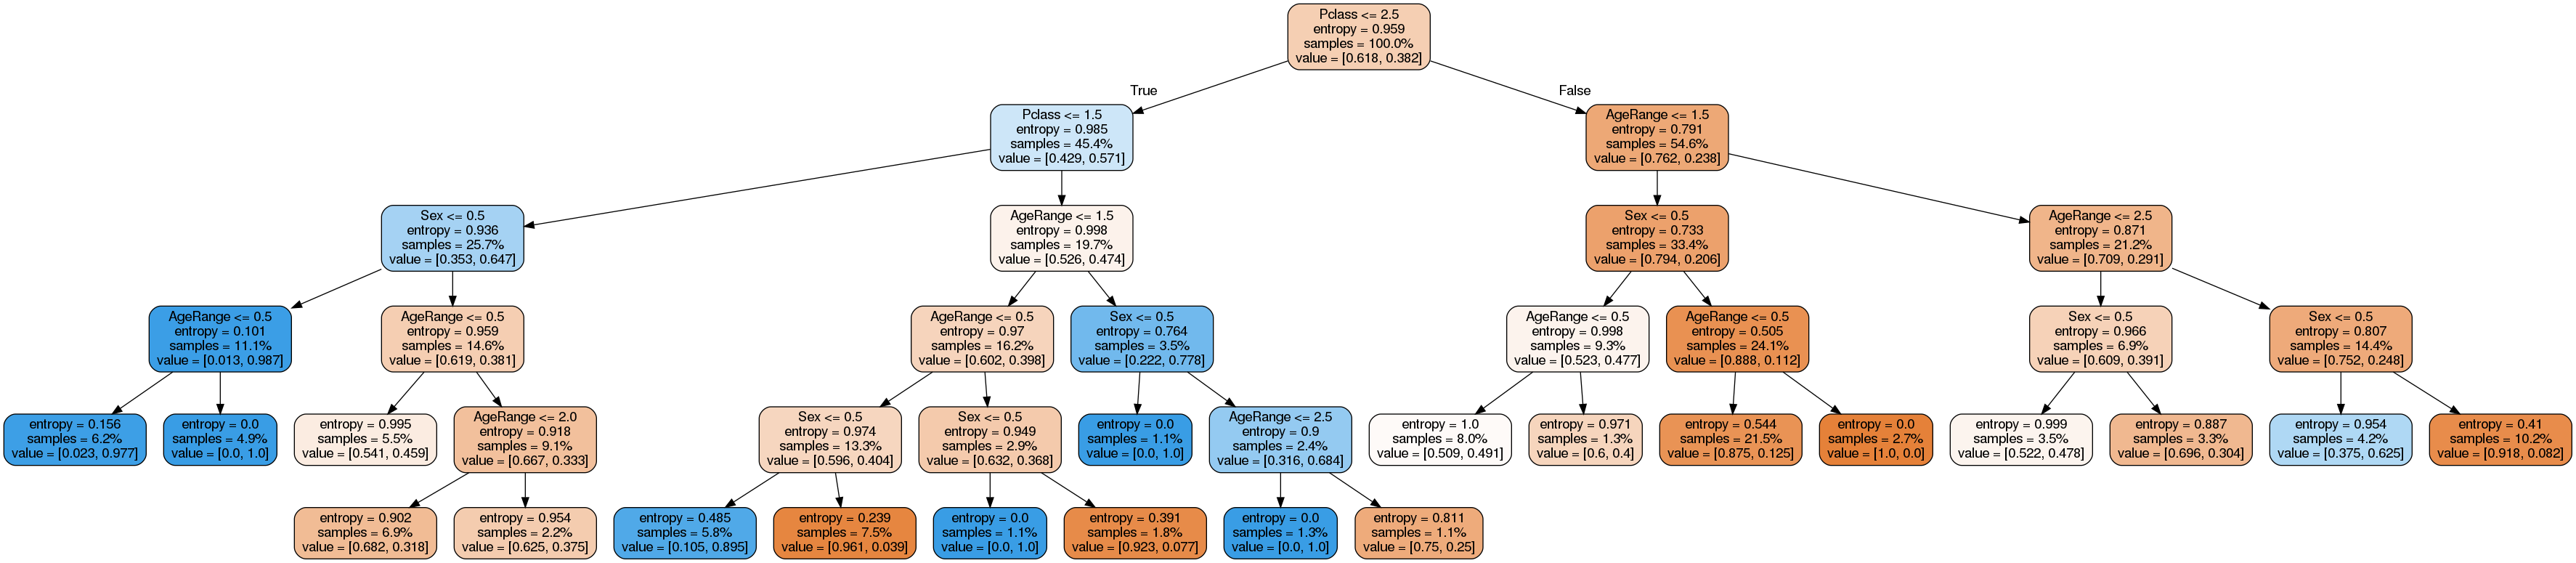

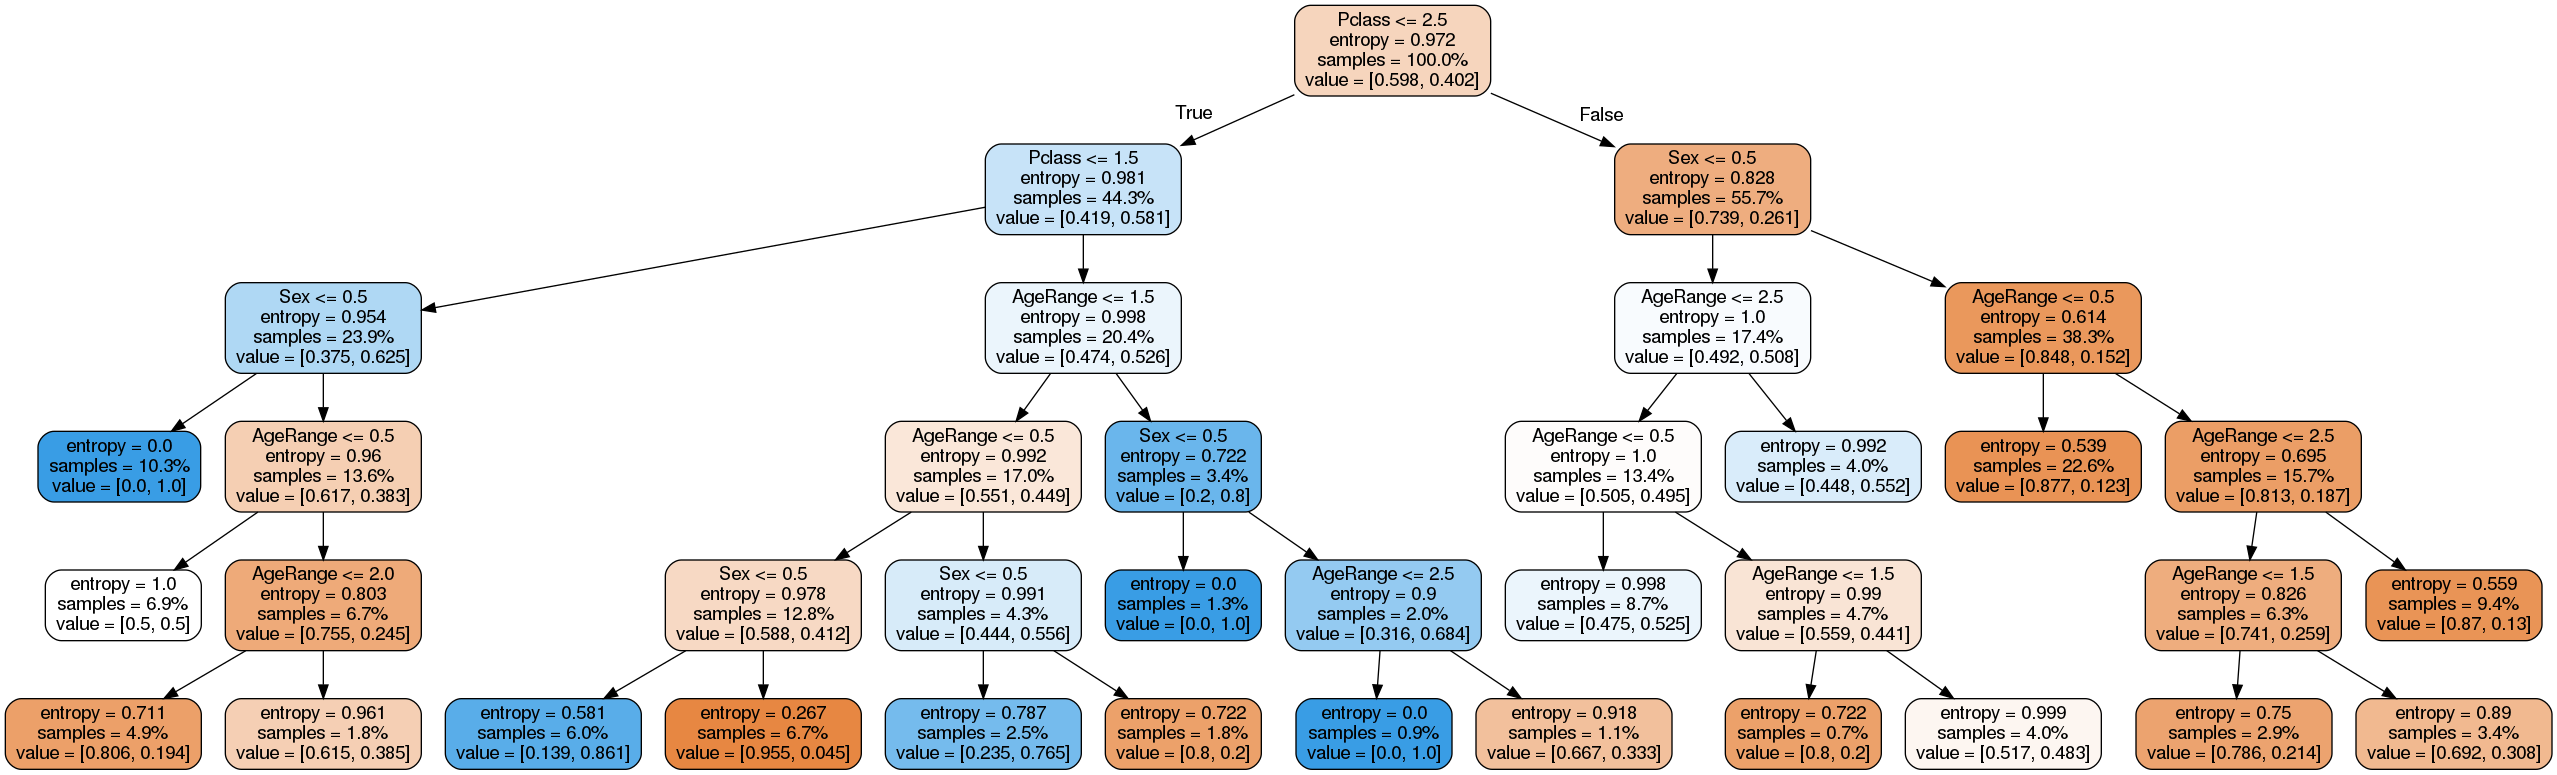

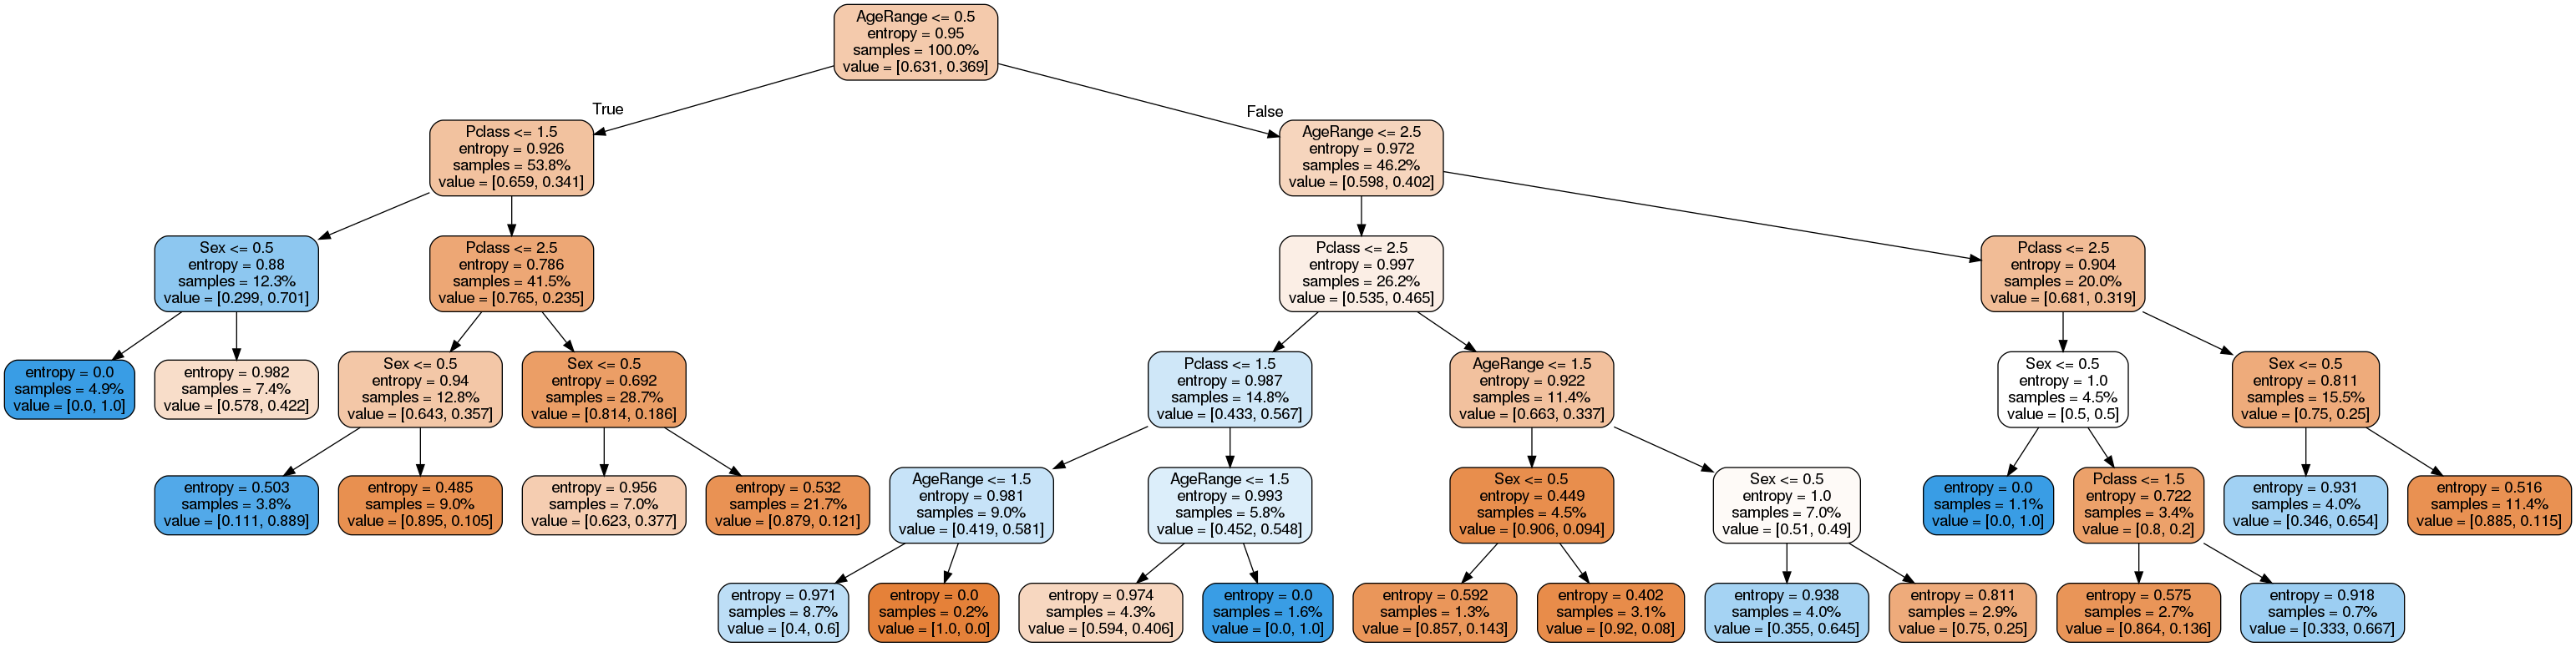

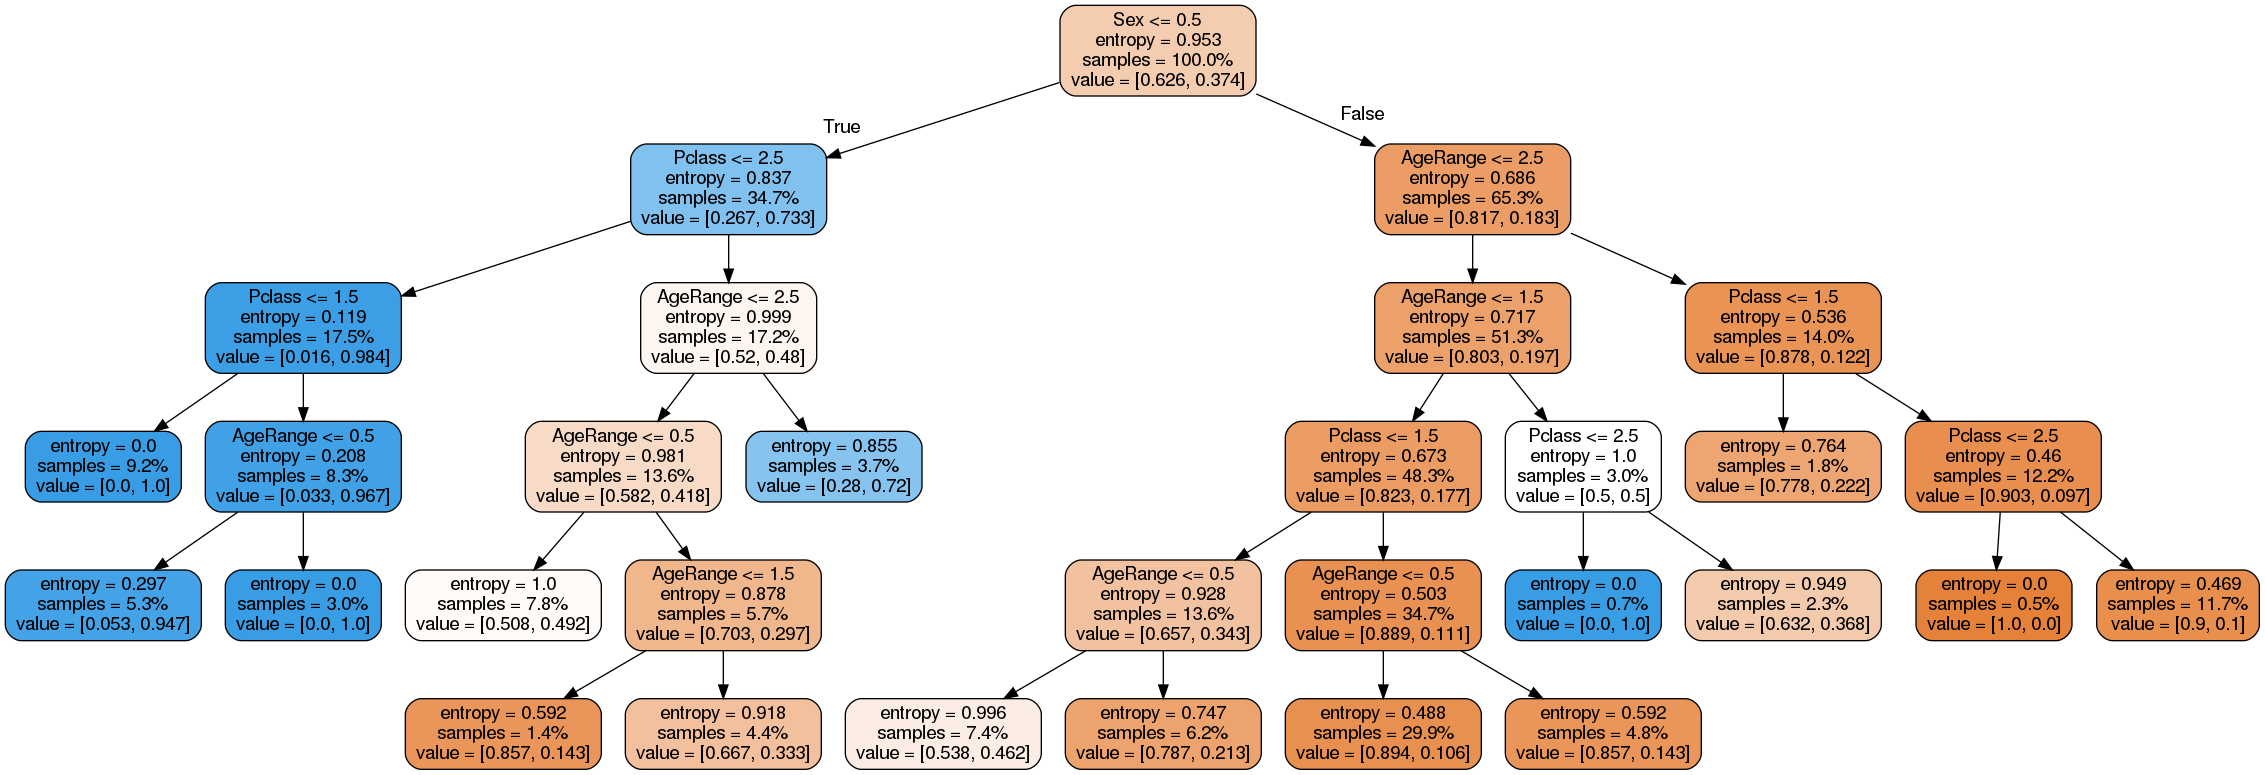

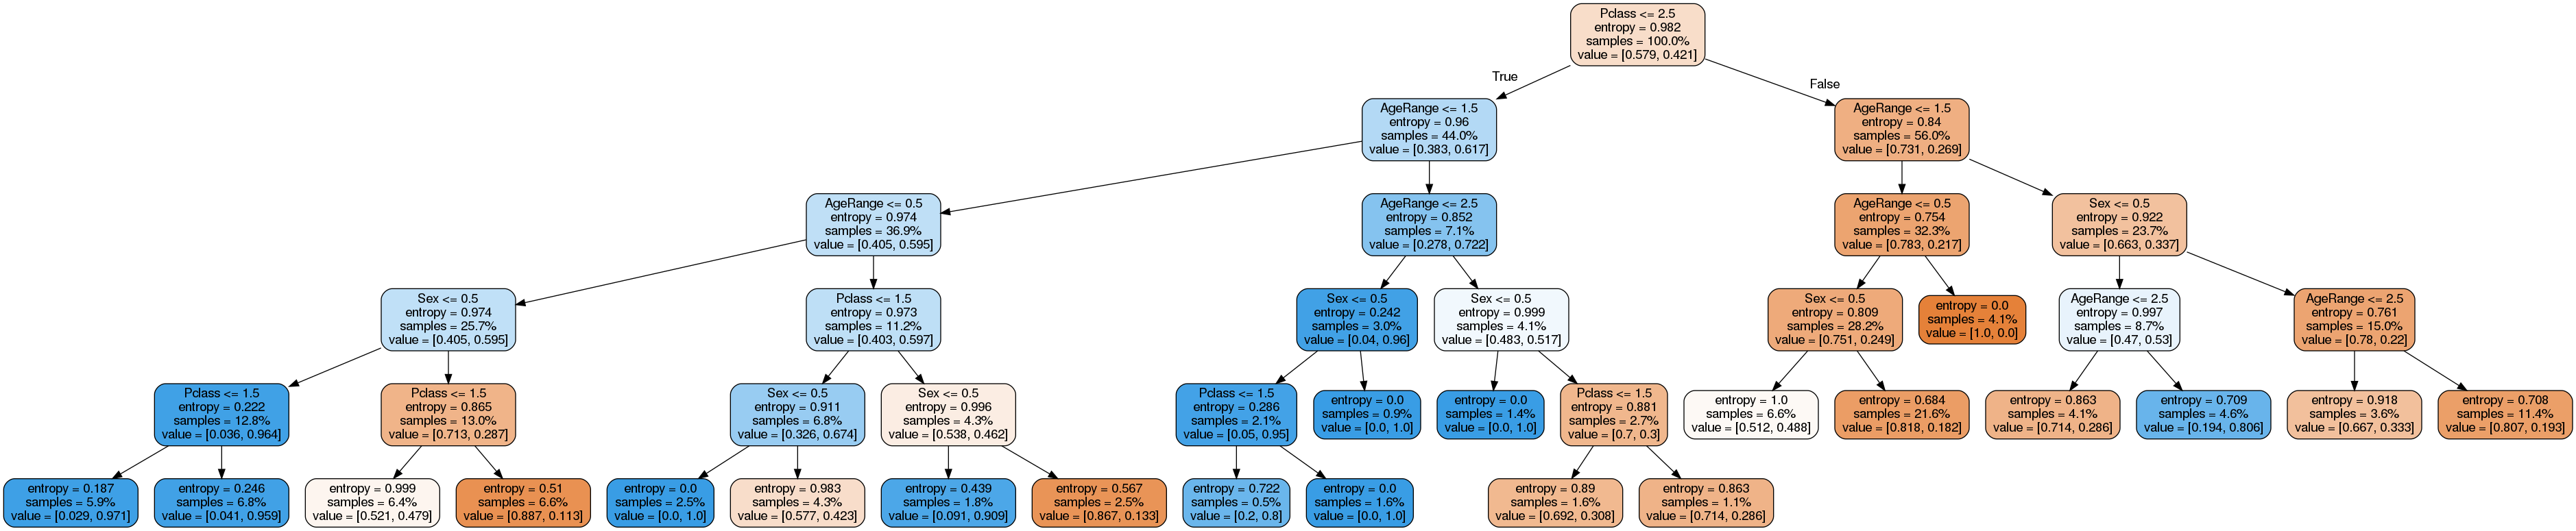

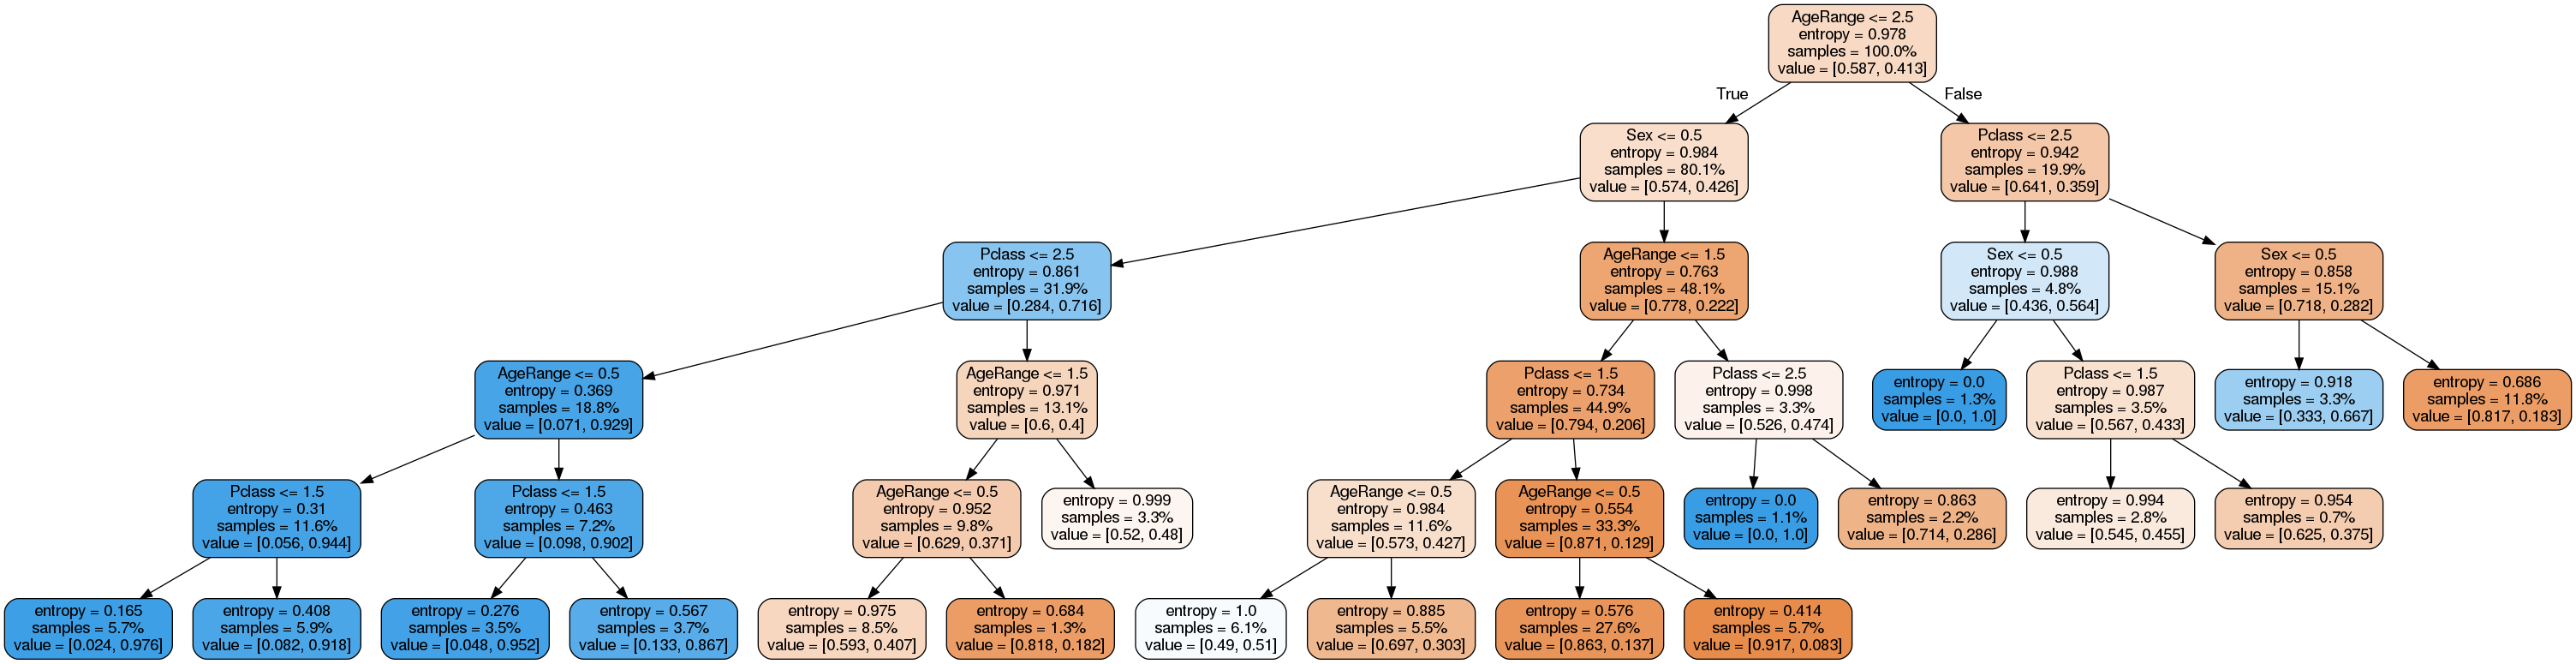

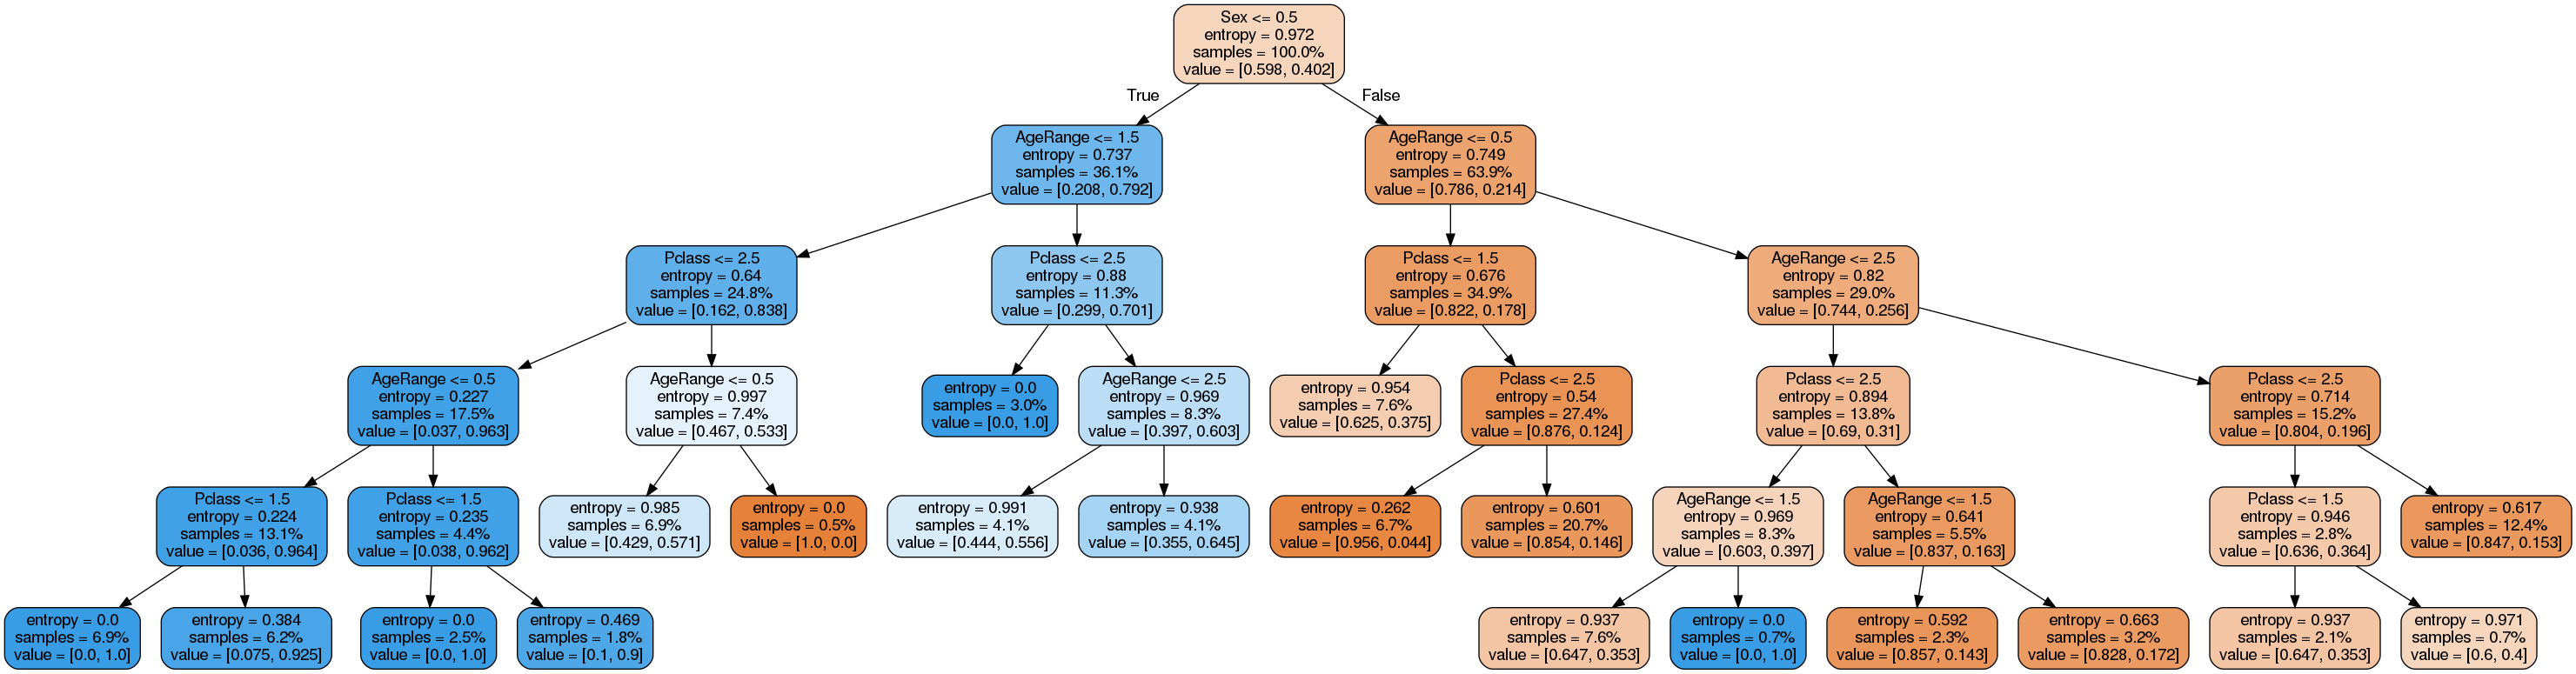

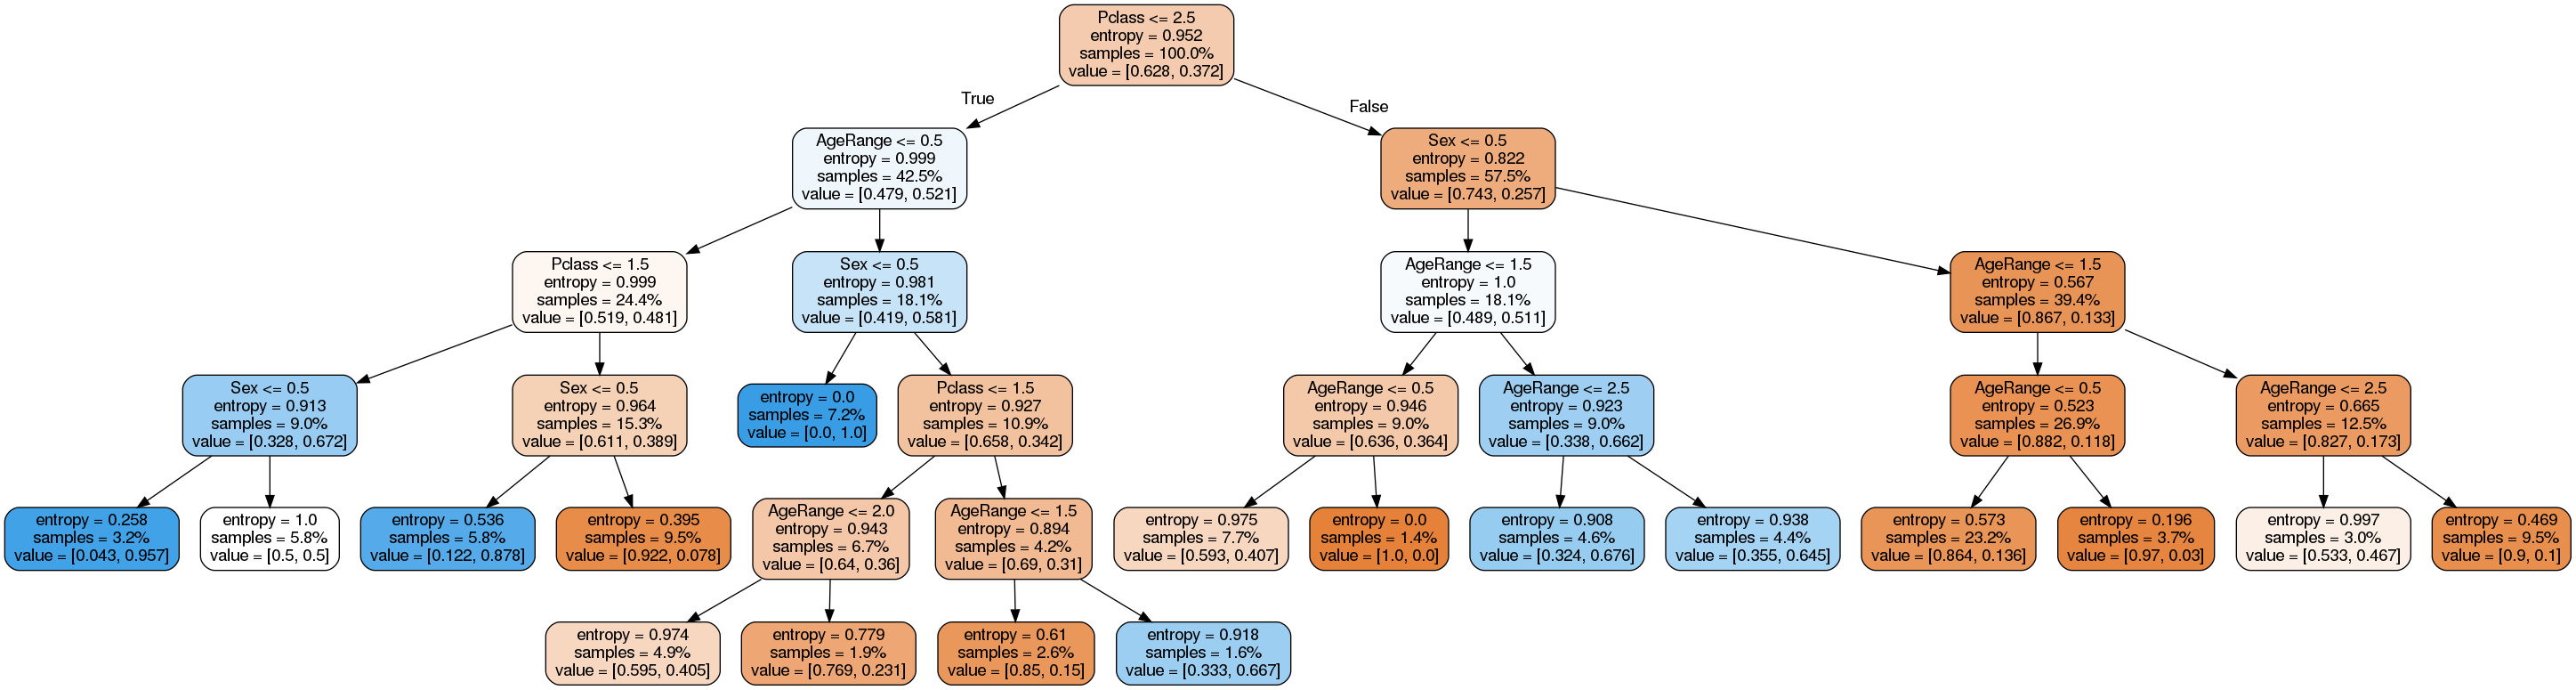

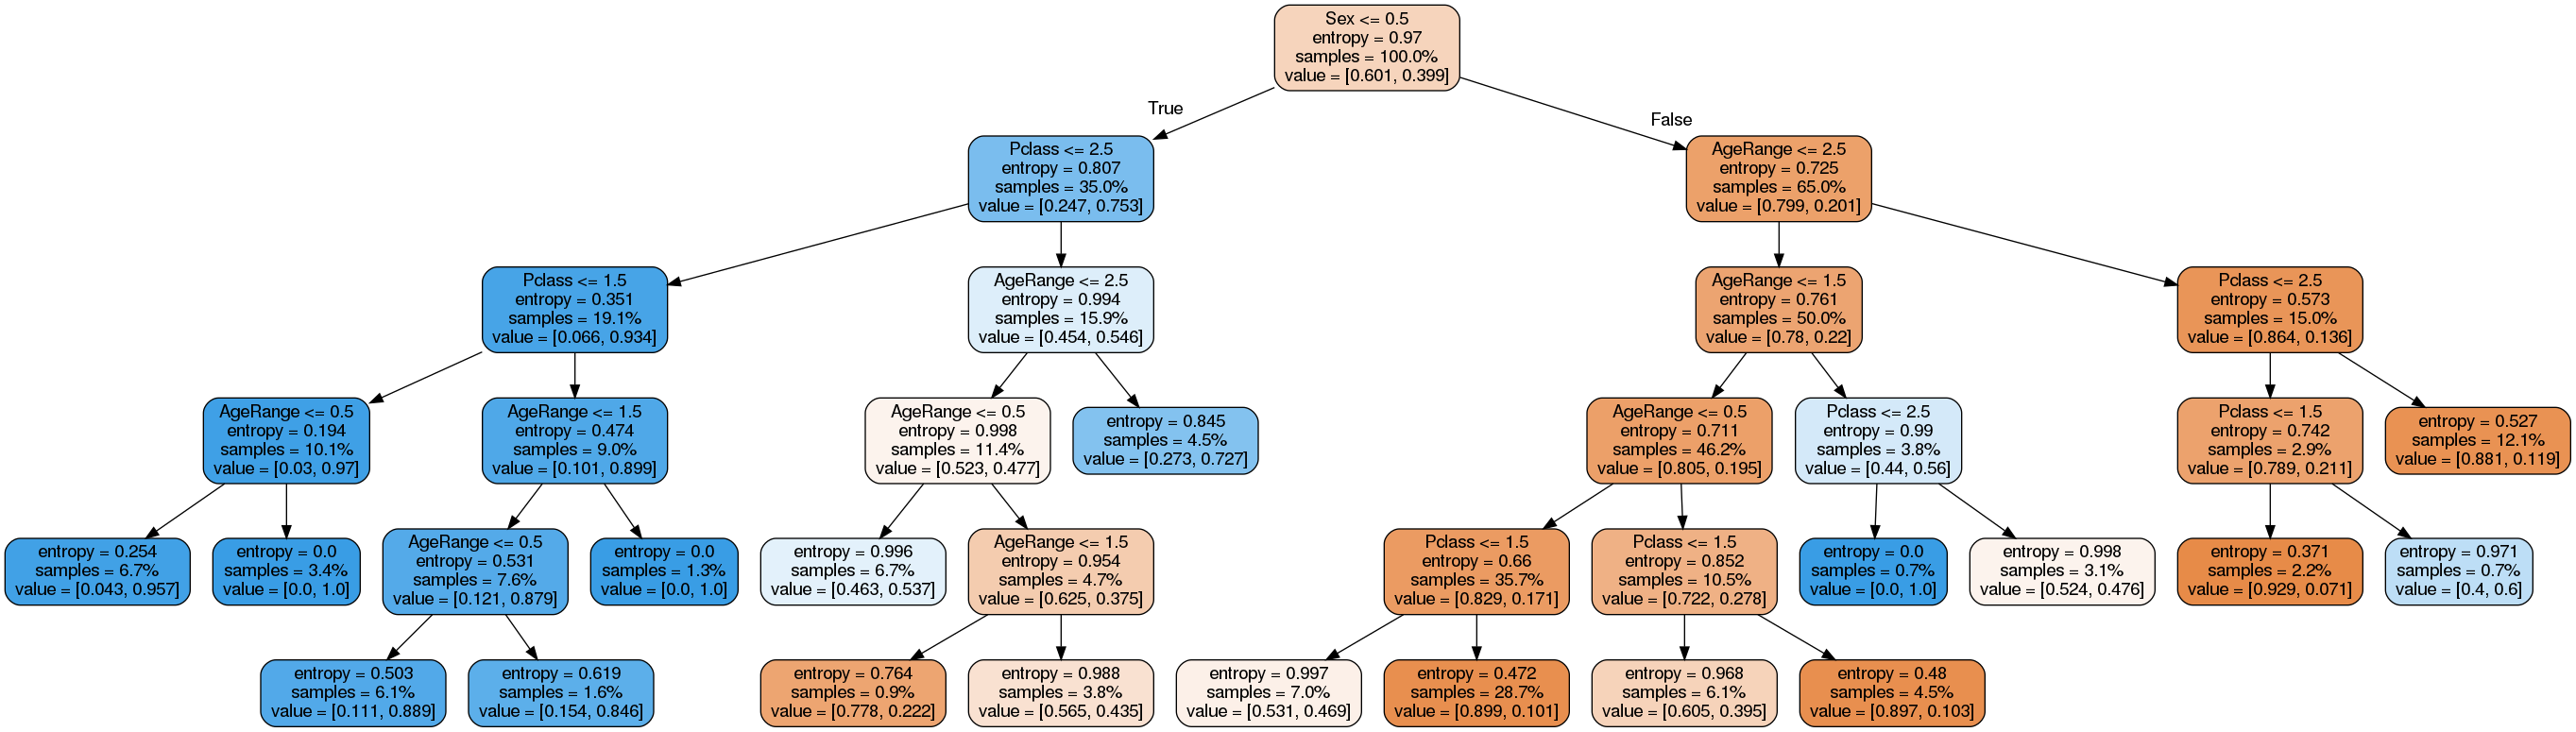

In [55]:

for dtc in rfc.estimators_:
    dot_data = StringIO()
    export_graphviz(dtc, out_file=dot_data,  
                    filled=True, rounded=True, feature_names=feature_names[1:4], proportion=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    display(Image(graph.create_png()))

In [8]:
import tensorflow as tf

/home/mahmoud/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
def fill_ages_fare(df):
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
    return df

def fill_embarked_cabin(df):
    return df.fillna({'Embarked': 'X','Cabin':'Dummy'})

def normalize_numeric_columns(df):
    df[['Age','Fare','Parch','SibSp']] = (df[['Age','Fare','Parch','SibSp']] - df[['Age','Fare','Parch','SibSp']].mean(axis=0))/df[['Age','Fare','Parch','SibSp']].std(axis=0)
    return df

In [10]:


def cabin_feature_columns():
    cabin_feature_columns = tf.feature_column.categorical_column_with_hash_bucket(
         key = 'Cabin',
         hash_bucket_size = 10)
    return  tf.feature_column.indicator_column(cabin_feature_columns)

def embarked_feature_columns():
    embarked_feature_columns = tf.feature_column.categorical_column_with_vocabulary_list( 
        key='Embarked',
        vocabulary_list = ('C','Q','S') )
    return tf.feature_column.indicator_column(embarked_feature_columns)

def sex_feature_columns():
    sex_feature_columns = tf.feature_column.categorical_column_with_vocabulary_list( 
        key='Sex',
        vocabulary_list = ['male','female'] )
    return tf.feature_column.indicator_column(sex_feature_columns)

def pclass_feature_columns():
    pclass_feature_columns = tf.feature_column.categorical_column_with_identity(
        key='Pclass',
        num_buckets = 4)
    return tf.feature_column.indicator_column(pclass_feature_columns)

def name_feature_columns():
    name_feature_columns = tf.feature_column.categorical_column_with_hash_bucket(
         key = 'Name',
         hash_bucket_size = 10)
    return tf.feature_column.indicator_column(name_feature_columns)

def ticket_feature_columns():
    ticket_feature_columns = tf.feature_column.categorical_column_with_hash_bucket(
        key = 'Ticket',
        hash_bucket_size = 5)
    return tf.feature_column.indicator_column(ticket_feature_columns)



In [11]:
train_titanic = fill_ages_fare(train_titanic)
test_titanic = fill_ages_fare(test_titanic)
train_titanic = fill_embarked_cabin(train_titanic)
test_titanic = fill_embarked_cabin(test_titanic)
train_titanic = normalize_numeric_columns(train_titanic)
test_titanic = normalize_numeric_columns(test_titanic)

In [12]:
my_feature_columns = []
my_feature_columns.append(pclass_feature_columns())
my_feature_columns.append(name_feature_columns())
my_feature_columns.append(sex_feature_columns())
my_feature_columns.append(tf.feature_column.numeric_column(key='Age'))
my_feature_columns.append(tf.feature_column.numeric_column(key='SibSp'))
my_feature_columns.append(tf.feature_column.numeric_column(key='Parch'))
my_feature_columns.append(ticket_feature_columns())
my_feature_columns.append(tf.feature_column.numeric_column(key='Fare'))
my_feature_columns.append(cabin_feature_columns())
my_feature_columns.append(embarked_feature_columns())
print(my_feature_columns)



[_IndicatorColumn(categorical_column=_IdentityCategoricalColumn(key='Pclass', num_buckets=4, default_value=None)), _IndicatorColumn(categorical_column=_HashedCategoricalColumn(key='Name', hash_bucket_size=10, dtype=tf.string)), _IndicatorColumn(categorical_column=_VocabularyListCategoricalColumn(key='Sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)), _NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='SibSp', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='Parch', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _IndicatorColumn(categorical_column=_HashedCategoricalColumn(key='Ticket', hash_bucket_size=5, dtype=tf.string)), _NumericColumn(key='Fare', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _IndicatorColumn(categorical_column=_HashedCategoricalColumn(key='Cabin', hash_bucket_size=10

In [13]:
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    optimizer=tf.train.ProximalAdagradOptimizer(learning_rate = 0.1,l2_regularization_strength=3.),
    hidden_units=[40,20,5],
    model_dir='titanic/model_2',
    n_classes=2)

# define input functions
def my_train_input_fn(features,label,batch,epochs):
    in_func = tf.estimator.inputs.pandas_input_fn(
    x=features,
    y=label,
    num_epochs=epochs,
    batch_size = batch,
    shuffle = True,
    )
    return in_func()

def my_eval_input_fn(features,label): 
    in_func = tf.estimator.inputs.pandas_input_fn(
    x=features,
    y=label,
    shuffle = False
    )
    return in_func()

def my_pred_input_fn(features): 
    in_func = tf.estimator.inputs.pandas_input_fn(
    x=features,
    shuffle = False
    )
    return in_func()

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'titanic/model_2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f141694e438>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [14]:
classifier.train(
     input_fn=lambda:my_train_input_fn(train_titanic[['Name','Sex','Pclass','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']], 
                                                 train_titanic['Survived'],128,15000),steps=15000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into titanic/model_2/model.ckpt.
INFO:tensorflow:loss = 93.28013, step = 1
INFO:tensorflow:global_step/sec: 220.14
INFO:tensorflow:loss = 56.402084, step = 101 (0.456 sec)
INFO:tensorflow:global_step/sec: 299.061
INFO:tensorflow:loss = 46.63981, step = 201 (0.334 sec)
INFO:tensorflow:global_step/sec: 273.947
INFO:tensorflow:loss = 50.32708, step = 301 (0.366 sec)
INFO:tensorflow:global_step/sec: 276.008
INFO:tensorflow:loss = 56.116116, step = 401 (0.362 sec)
INFO:tensorflow:global_step/sec: 291.35
INFO:tensorflow:loss = 49.05153, step = 501 (0.342 sec)
INFO:tensorflow:global_step/sec: 285.451
INFO:tensorflow:loss = 41.164577, step = 601 (0.350 sec)
INFO:tensorflow:global_step/sec: 278.92
INFO:tensorflow:loss = 4

INFO:tensorflow:global_step/sec: 341.689
INFO:tensorflow:loss = 45.614174, step = 8101 (0.293 sec)
INFO:tensorflow:global_step/sec: 343.219
INFO:tensorflow:loss = 47.746872, step = 8201 (0.292 sec)
INFO:tensorflow:global_step/sec: 343.976
INFO:tensorflow:loss = 52.512314, step = 8301 (0.291 sec)
INFO:tensorflow:global_step/sec: 345.328
INFO:tensorflow:loss = 40.465675, step = 8401 (0.290 sec)
INFO:tensorflow:global_step/sec: 333.566
INFO:tensorflow:loss = 48.083767, step = 8501 (0.299 sec)
INFO:tensorflow:global_step/sec: 273.317
INFO:tensorflow:loss = 42.19975, step = 8601 (0.367 sec)
INFO:tensorflow:global_step/sec: 323.541
INFO:tensorflow:loss = 42.005405, step = 8701 (0.307 sec)
INFO:tensorflow:global_step/sec: 342.828
INFO:tensorflow:loss = 43.958065, step = 8801 (0.292 sec)
INFO:tensorflow:global_step/sec: 307.684
INFO:tensorflow:loss = 44.20353, step = 8901 (0.327 sec)
INFO:tensorflow:global_step/sec: 339.079
INFO:tensorflow:loss = 42.67315, step = 9001 (0.295 sec)
INFO:tensorfl

In [15]:
eval_result = classifier.evaluate(
    input_fn=lambda:my_eval_input_fn(train_titanic[['Name','Sex','Pclass','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']], 
                                                 train_titanic['Survived']))
print('\nTrain set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-07-23:51:54
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from titanic/model_2/model.ckpt-15000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-07-23:51:56
INFO:tensorflow:Saving dict for global step 15000: accuracy = 0.85746354, accuracy_baseline = 0.6161616, auc = 0.90621966, auc_precision_recall = 0.8852965, average_loss = 0.36134067, global_step = 15000, label/mean = 0.3838384, loss = 45.993504, precision = 0.86195284, prediction/mean = 0.3831888, recall = 0.748538

Train set accuracy: 0.857



In [16]:
predictions = classifier.predict(
     input_fn=lambda:my_pred_input_fn(test_titanic[['Name','Sex','Pclass','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']]))
print ('Predictions: {}'.format(str(predictions)))

Predictions: <generator object Estimator.predict at 0x7f14169455c8>


In [ ]:
res=[]
for pid, pred_dict in zip(test_titanic['PassengerId'],predictions):
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]
    res.append ([pid,class_id])
res_df = pd.DataFrame.from_records(res,columns = ['PassengerId','Survived'])
res_df.head()
res_df.to_csv("submission.csv",index=False)